- 이미지증폭
- 증폭된 이미지로 학습용과 테스트용 데이터 분리(폴더기준으로 자동)
- 학습
- 예측

In [ ]:
! unzip '/content/drive/MyDrive/deepLearning/data/horse-or-human.zip' -d 'data'
training_dir = 'data'

In [2]:
from tensorflow import keras

In [3]:
training_dir = 'data'
train_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size = (300,300),
    class_mode = 'binary'
)

Found 1027 images belonging to 2 classes.


In [4]:
model = keras.models.load_model('/content/drive/MyDrive/deepLearning/data/human.h5')

In [5]:
model.fit(train_generator,epochs=15)

Epoch 1/15
33/33 [==============================] - 43s 893ms/step - loss: 0.8098 - accuracy: 0.5988
Epoch 2/15
33/33 [==============================] - 29s 866ms/step - loss: 0.6007 - accuracy: 0.6816
Epoch 3/15
33/33 [==============================] - 29s 868ms/step - loss: 0.6262 - accuracy: 0.6641
Epoch 4/15
33/33 [==============================] - 29s 874ms/step - loss: 0.5715 - accuracy: 0.6962
Epoch 5/15
33/33 [==============================] - 29s 873ms/step - loss: 0.4870 - accuracy: 0.7634
Epoch 6/15
33/33 [==============================] - 29s 867ms/step - loss: 0.4606 - accuracy: 0.7858
Epoch 7/15
33/33 [==============================] - 29s 868ms/step - loss: 0.3770 - accuracy: 0.8199
Epoch 8/15
33/33 [==============================] - 29s 866ms/step - loss: 0.3290 - accuracy: 0.8559
Epoch 9/15
33/33 [==============================] - 29s 866ms/step - loss: 0.3822 - accuracy: 0.8238
Epoch 10/15
33/33 [==============================] - 29s 869ms/step - loss: 0.3552 - accura

In [6]:
model.save("/content/drive/MyDrive/deepLearning/data/human_generator.h5")

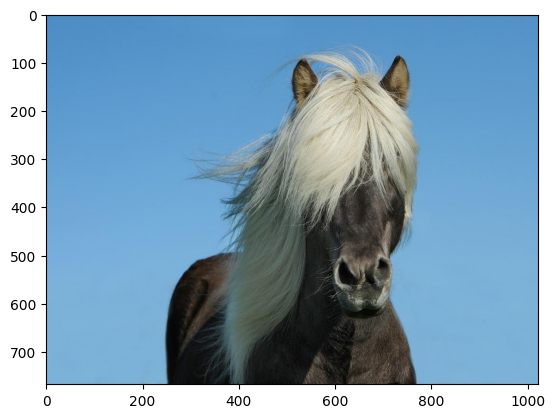

1/1 [==============================] - 0s 24ms/step
사람


In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
imgefile = '/content/drive/MyDrive/deepLearning/data/hh_image_3.jpg'
plt.imshow(mpimg.imread(imgefile))
plt.show()
# 이미지 불러오기(데이터)
img = keras.utils.load_img(imgefile, target_size=(300,300))
x = keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)  # (None,300,300,3) (1,300,300,3)
classess = model.predict(x)
if classess[0][0] > 0.5:
  print("사람")
else:
  print("말")

전이학습
  - Tensorflow Hub 에서 가져옮

In [15]:
InceptionV3 = keras.applications.inception_v3.InceptionV3

In [18]:
import urllib
weight_url = '/content/drive/MyDrive/deepLearning/data/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_trained_model =  InceptionV3(
    input_shape = (150,150,3),
    include_top = False,
    weights=None
            )
pre_trained_model.load_weights(weight_url)

In [ ]:
pre_trained_model.summary()

In [21]:
# 사전 훈련된 모델의 가중치 고정시킴
for layer in pre_trained_model.layers:
  layer.trainable = False

In [ ]:
pre_trained_model.summary()

In [27]:
last_layer =  pre_trained_model.get_layer('mixed7')
print(last_layer.output_shape)
last_output =  last_layer.output

(None, 7, 7, 768)


In [28]:
# 출력을 펴서 1차원으로 만든다
# 함수형 API로 모델만들기
# 클래스()(data)
x = keras.layers.Flatten()(last_output)
x = keras.layers.Dense(1024,activation='relu')(x)
x = keras.layers.Dense(1,activation='sigmoid')(x)

In [29]:
model = keras.Model(pre_trained_model.input, x)

In [31]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')

In [34]:
train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size = (150,150),
    class_mode = 'binary'
)

Found 1027 images belonging to 2 classes.


In [35]:
model.fit(train_generator,epochs=15)

Epoch 1/15
33/33 [==============================] - 14s 376ms/step - loss: 0.5046 - accuracy: 0.9270
Epoch 2/15
33/33 [==============================] - 12s 345ms/step - loss: 0.1431 - accuracy: 0.9805
Epoch 3/15
33/33 [==============================] - 12s 367ms/step - loss: 0.0696 - accuracy: 0.9873
Epoch 4/15
33/33 [==============================] - 12s 370ms/step - loss: 0.0635 - accuracy: 0.9903
Epoch 5/15
33/33 [==============================] - 12s 355ms/step - loss: 0.0087 - accuracy: 0.9981
Epoch 6/15
33/33 [==============================] - 11s 324ms/step - loss: 0.0296 - accuracy: 0.9922
Epoch 7/15
33/33 [==============================] - 12s 363ms/step - loss: 0.0258 - accuracy: 0.9942
Epoch 8/15
33/33 [==============================] - 12s 369ms/step - loss: 0.0167 - accuracy: 0.9971
Epoch 9/15
33/33 [==============================] - 12s 370ms/step - loss: 0.0626 - accuracy: 0.9893
Epoch 10/15
33/33 [==============================] - 12s 367ms/step - loss: 0.0197 - accura

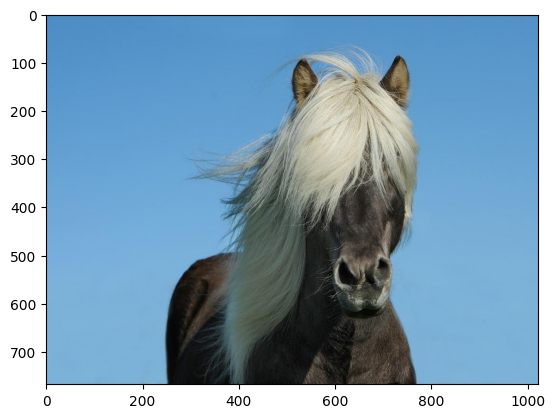

1/1 [==============================] - 0s 26ms/step
사람


array([[1.]], dtype=float32)

In [39]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
imgefile = '/content/drive/MyDrive/deepLearning/data/hh_image_3.jpg'
plt.imshow(mpimg.imread(imgefile))
plt.show()
# 이미지 불러오기(데이터)
img = keras.utils.load_img(imgefile, target_size=(150,150))
x = keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)  # (None,150,150,3) (1,150,150,3)
classess = model.predict(x)
if classess[0][0] > 0.5:
  print("사람")
else:
  print("말")

classess